In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- ./ai/bin/python -m pip install pandas

In [24]:
train = pd.read_csv("titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [28]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Sex'>

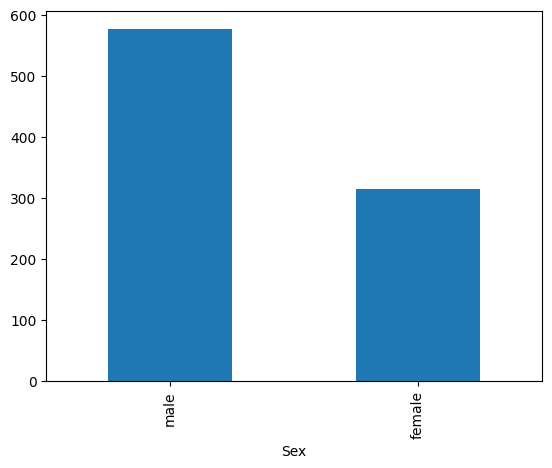

In [29]:
train["Sex"].value_counts().plot(kind="bar")

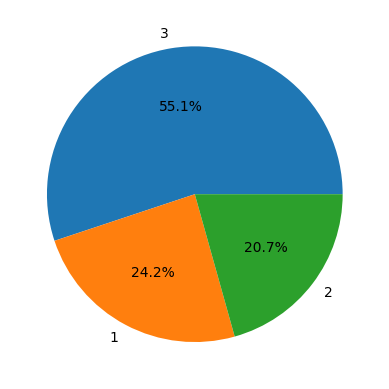

In [30]:
temp = train["Pclass"].value_counts()
plt.pie(temp, labels=temp.index, autopct="%.1f%%")
plt.show()

/var/folders/85/7s819_n161b375f1vb84mfkw0000gn/T/ipykernel_86667/1020748889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='coolwarm')


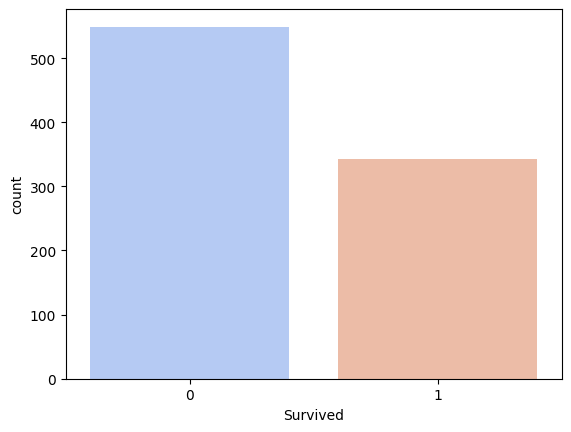

In [31]:
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.show()

/var/folders/85/7s819_n161b375f1vb84mfkw0000gn/T/ipykernel_86667/190373374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sex', y = 'Survived', data=train, palette='coolwarm')


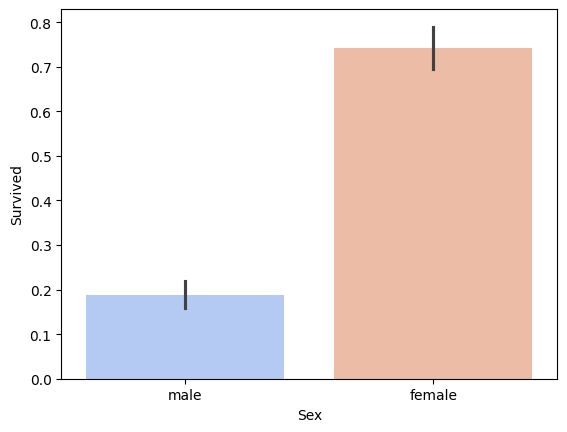

In [32]:
sns.barplot(x = 'Sex', y = 'Survived', data=train, palette='coolwarm')
plt.show()

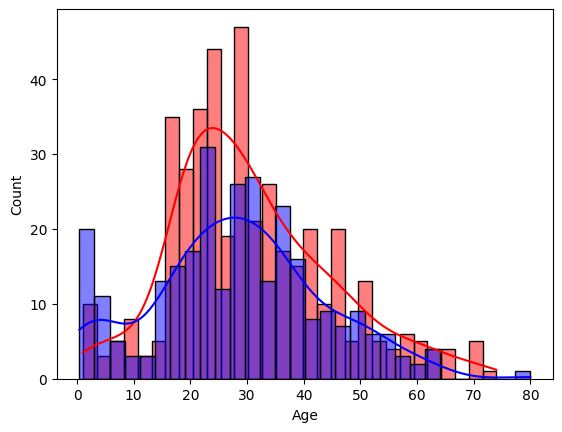

In [33]:
sns.histplot(train[train['Survived'] == 0]['Age'], bins=30, color='red', kde=True)
sns.histplot(train[train['Survived'] == 1]['Age'], bins=30, color='blue', kde=True)
plt.show()

In [34]:
train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [35]:
train.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [36]:
from scipy.stats import chi2_contingency

In [37]:
table = pd.crosstab(train['Pclass'], train['Survived'])
# print(chi2_contingency(table))
stat, pvalue, dof, expected = chi2_contingency(table)
print(pvalue) # 0.05보다 작으므로 Pclass와 Survived는 통계적으로 유의미한 관계가 있다.

4.549251711298793e-23


In [38]:
# 결측치 처리
train["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [39]:
train["title"] = train["Name"].str.extract(r",\s*([^.]+).")
train["title"].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [40]:
train[train["Age"].isnull()]["Name"].str.extract(r",\s*([^.]+).").value_counts()

0     
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [41]:
train[train["title"] == "Mr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
temp = train[train["Age"].isnull()]["title"].value_counts()

for title in temp.index:
    value = train[train["title"] == title]["Age"].mean()
    print(f"{title} : {value:.2f}") 

Mr : 32.37
Miss : 21.77
Mrs : 35.90
Master : 4.57
Dr : 42.00


In [43]:
train.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [44]:
train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [45]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
dtype: int64

In [46]:
title_age_mean = train.groupby('title')['Age'].mean()
train['Age']  = train.apply(lambda row: title_age_mean[row['title']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
temp = train[train["Age"].isnull()]["title"].value_counts()

for title in temp.index:
    value = train[train["title"] == title]["Age"].mean()
    train[train["title"] == title][["Age"] == title]["Age"].fillna(value)

SyntaxError: incomplete input (2861667271.py, line 1)

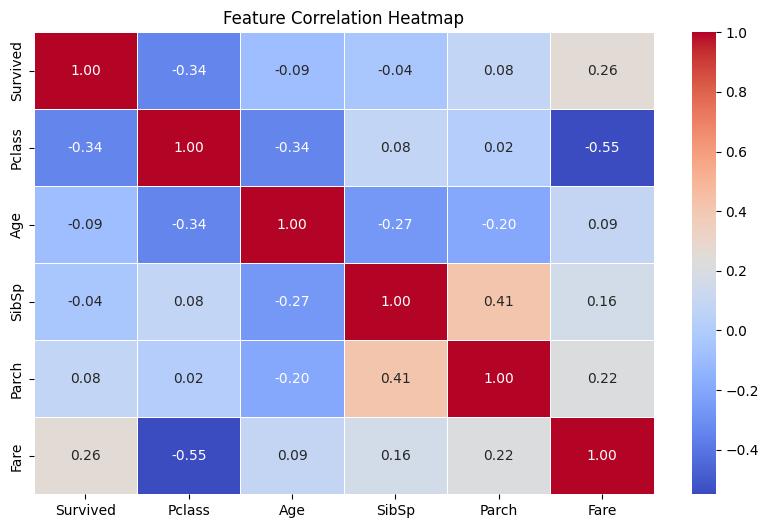

In [49]:
train_num = train[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
correlation_matrix = train_num.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()